## Project Set-Up

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
import yfinance as yf  # Importing yfinance for American stock data

In [4]:
# Setting matplotlib style
plt.style.use('fivethirtyeight')  

In [6]:
df = pd.read_csv('ticker_data.csv')

In [7]:
df

,AAPL,NVDA,MSFT
0,54.340000,5.884500,107.599998
1,55.537498,6.145750,111.000000
2,55.297501,6.076500,110.709999
3,54.005001,5.988250,108.500000
4,54.827499,5.729250,108.660004
...,...,...,...
1514,235.860001,143.589996,427.510010
1515,230.759995,139.559998,424.600006
1516,230.570007,140.410004,424.730011
1517,231.410004,141.539993,428.149994


## Analysis

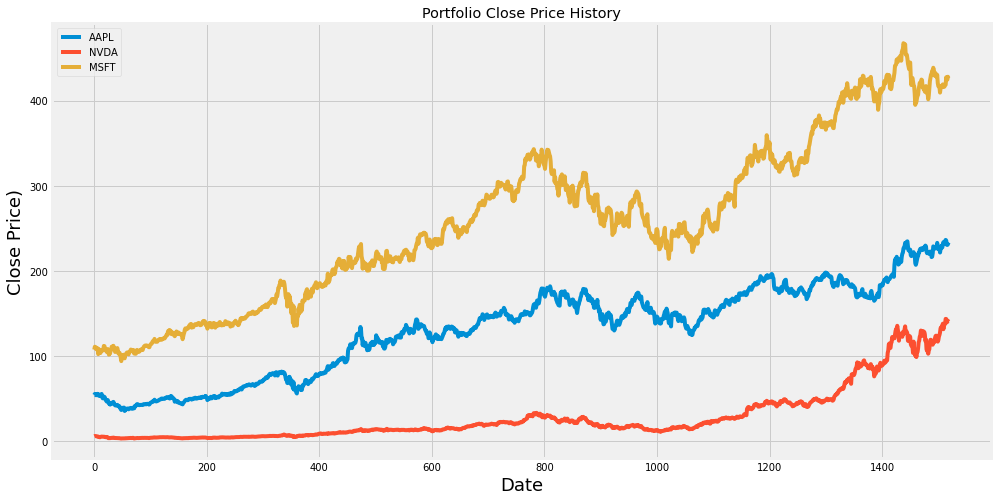

In [8]:

fig, ax = plt.subplots(figsize=(15, 8))

for i in df.columns.values:
    ax.plot(df[i], label=i)

ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price)', fontsize=18)
ax.legend(df.columns.values, loc='upper left')


## Correlation Matrix

          AAPL      NVDA      MSFT
AAPL  1.000000  0.760483  0.956072
NVDA  0.760483  1.000000  0.854108
MSFT  0.956072  0.854108  1.000000
Correlation between Stocks in your portfolio


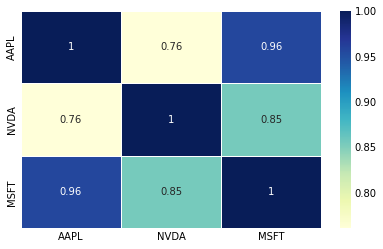

In [9]:
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

fig1 = plt.figure()
sb.heatmap(correlation_matrix, 
           xticklabels=correlation_matrix.columns, 
           yticklabels=correlation_matrix.columns,
           cmap='YlGnBu', ###this is just the color of the heatmap 
           annot=True, 
           linewidth=0.5)

print('Correlation between Stocks in your portfolio')

## Risk & Return
### Calculate daily simple returns

          AAPL      NVDA      MSFT
1     0.022037  0.044396  0.031599
2    -0.004321 -0.011268 -0.002613
3    -0.023374 -0.014523 -0.019962
4     0.015230 -0.043251  0.001475
5     0.006110  0.008945  0.008927
...        ...       ...       ...
1514 -0.002622 -0.000835  0.020846
1515 -0.021623 -0.028066 -0.006807
1516 -0.000823  0.006091  0.000306
1517  0.003643  0.008048  0.008052
1518  0.008599 -0.007206 -0.003644

[1518 rows x 3 columns]
Daily simple returns


Text(0, 0.5, 'Daily Simple Returns')

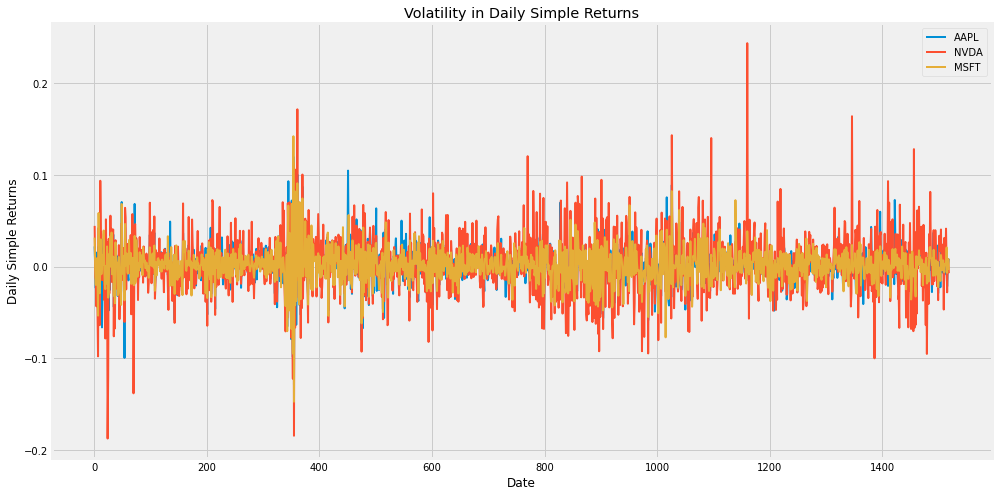

In [10]:
daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)

# Print daily simple returns
print(daily_simple_return)
print('Daily simple returns')

# Plot daily simple returns
fig, ax = plt.subplots(figsize=(15, 8))

for i in daily_simple_return.columns.values:
    ax.plot(daily_simple_return[i], lw=2, label=i)

ax.legend(loc='upper right', fontsize=10)
ax.set_title('Volatility in Daily Simple Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Simple Returns')

## Average Daily returns

In [11]:
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)

Average Daily returns(%) of stocks in your portfolio
AAPL    0.115912
NVDA    0.265732
MSFT    0.108114
dtype: float64


## Risk Box-Plot
### Box plot for daily simple returns

<AxesSubplot: title={'center': 'Risk Box Plot'}>

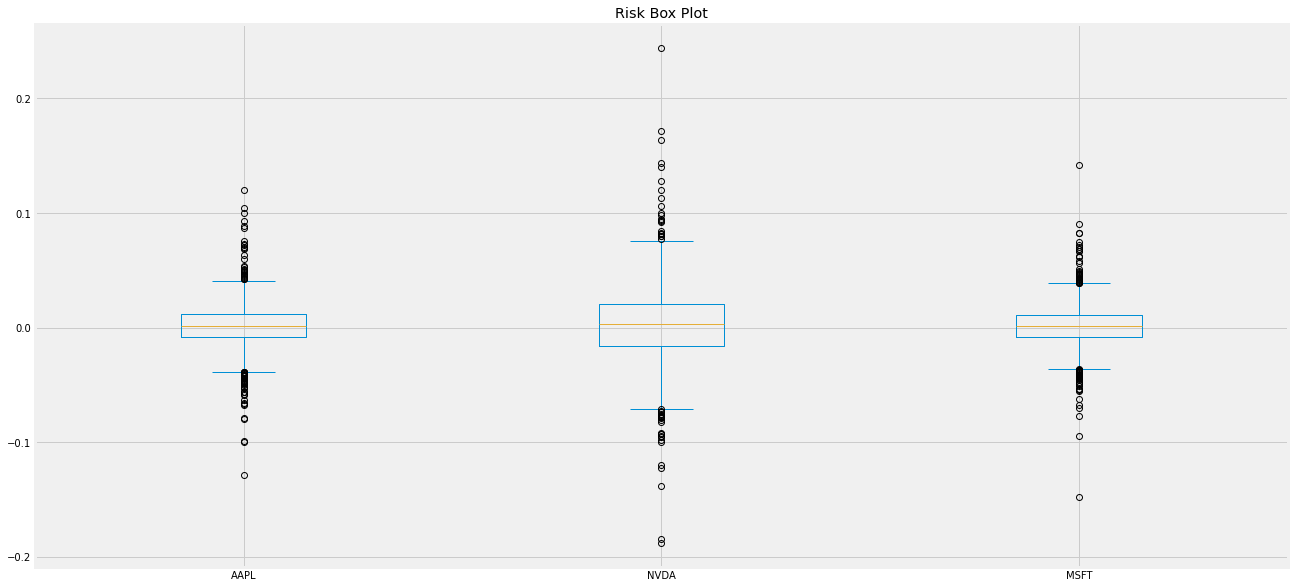

In [12]:
daily_simple_return.plot(kind="box", figsize=(20, 10), title="Risk Box Plot")


## Print annualized standard deviation

In [13]:
print('Annualized Standard Deviation (Volatility(%), 252 trading days) of individual stocks in your portfolio based on daily simple returns:')
print(daily_simple_return.std() * np.sqrt(252) * 100)

Annualized Standard Deviation (Volatility(%), 252 trading days) of individual stocks in your portfolio based on daily simple returns:
AAPL    31.632430
NVDA    53.445060
MSFT    29.561604
dtype: float64


## Return Per Unit Of Risk

In [14]:
print(Avg_daily / (daily_simple_return.std() * np.sqrt(252)) * 100)

AAPL    0.366433
NVDA    0.497206
MSFT    0.365725
dtype: float64


## Cumulative Returns

In [15]:
daily_cumulative_simple_return = (daily_simple_return + 1).cumprod()
print(daily_cumulative_simple_return)

          AAPL       NVDA      MSFT
1     1.022037   1.044396  1.031599
2     1.017621   1.032628  1.028903
3     0.993835   1.017631  1.008364
4     1.008971   0.973617  1.009851
5     1.015136   0.982326  1.018866
...        ...        ...       ...
1514  4.340449  24.401393  3.973141
1515  4.246595  23.716543  3.946097
1516  4.243099  23.860991  3.947305
1517  4.258557  24.053019  3.979089
1518  4.295178  23.879685  3.964591

[1518 rows x 3 columns]


## Visualize the daily cumulative simple return

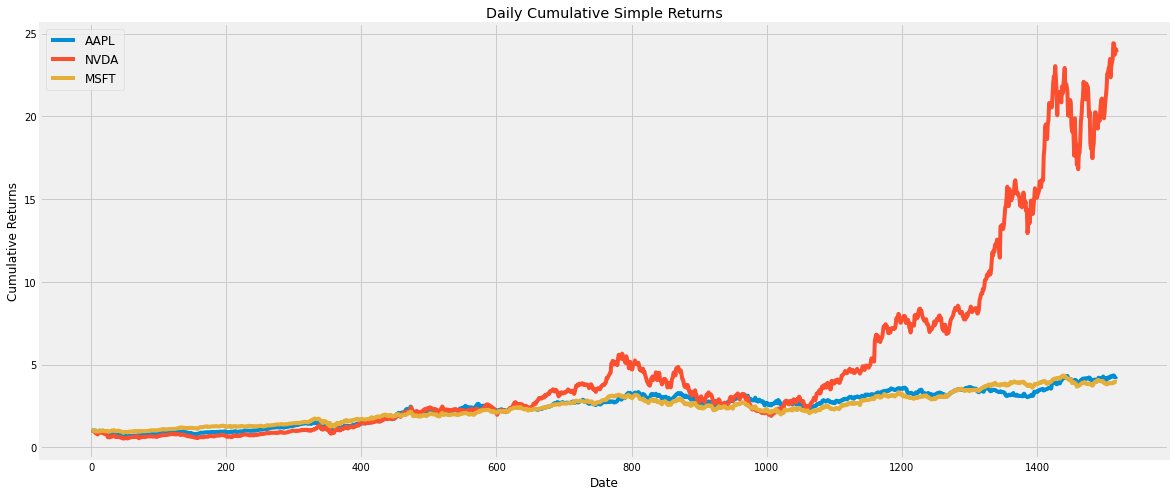

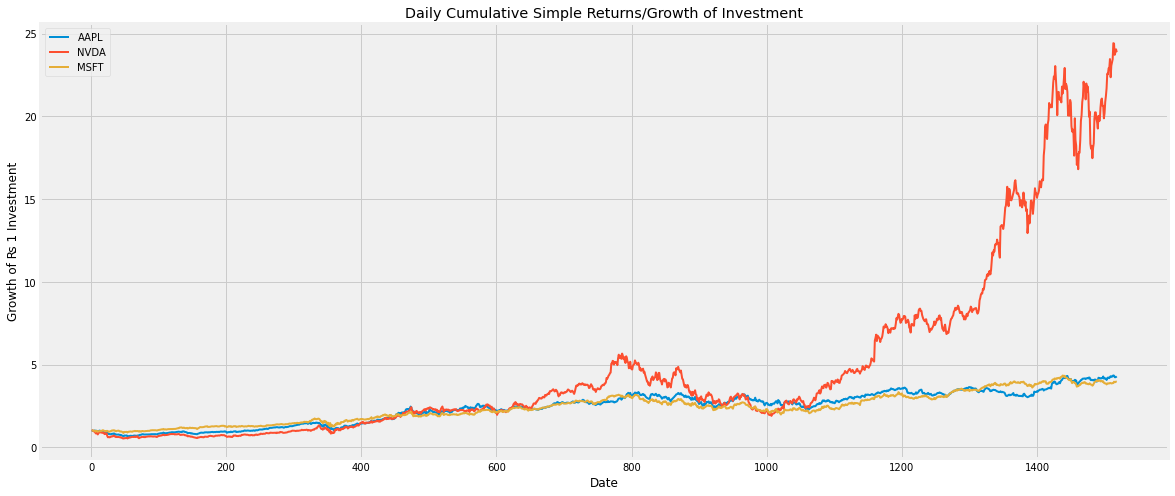

In [16]:
fig, ax = plt.subplots(figsize=(18, 8))

for column in daily_cumulative_simple_return.columns:
    ax.plot(daily_cumulative_simple_return[column], label=str(column))

ax.legend(loc='upper left', fontsize=12)
ax.set_title('Daily Cumulative Simple Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

# Visualize the daily cumulative simple return
fig, ax = plt.subplots(figsize=(18, 8))

for i in daily_cumulative_simple_return.columns.values:
    ax.plot(daily_cumulative_simple_return[i], lw=2, label=i)

ax.legend(loc='upper left', fontsize=10)
ax.set_title('Daily Cumulative Simple Returns/Growth of Investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 Investment')

plt.show()